In [1]:
#Question 1
A = [1,2,3,4,5,6]
B = [13, 21, 34]
#Create a list with output: A_B = [1, 2, 3, 4, 5, 6, 13, 21, 34]
A.extend(B)
A_B = A
print(A_B)
#OR
#A_B = A + B
#print(A_B)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


In [2]:
#Question 2
import numpy as np
#Create an identity matrix in python
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [6]:
#Question 3
import pandas as pd
#read data from dataset file
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(url, error_bad_lines=False)
#fuel type code in order of lowest average fuel cost per unit burned
fuel_data.groupby(['fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].mean().sort_values(ascending=True)

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

(1, 12000)

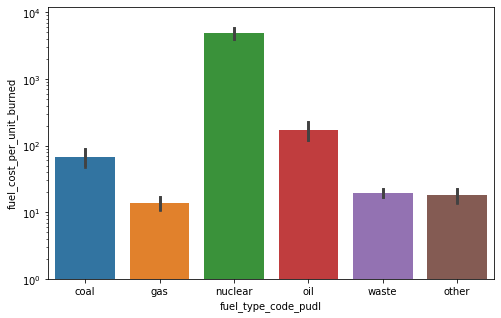

In [23]:
#Question 3 Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
fuel_type = fuel_data['fuel_type_code_pudl']
fuel_costb = fuel_data['fuel_cost_per_unit_burned']
plt.figure(figsize=(8,5))
plt.xticks(rotation=360)
sns.barplot(x = fuel_type, y = fuel_costb, data=fuel_data)
plt.xlabel('Fuel Type Code')
g = sns.barplot(x = fuel_type, y =fuel_costb)
g.set_yscale("log")
g.set_ylim(1, 12000)

In [8]:
#Question 4
#standard deviation and 75th percentile rounded to 2 decimal places in summary statistics with describe() function
fuel_data['fuel_mmbtu_per_unit'].describe().round(2)

count    29523.00
mean         8.49
std         10.60
min          0.00
25%          1.02
50%          5.76
75%         17.01
max        341.26
Name: fuel_mmbtu_per_unit, dtype: float64

In [11]:
#Question 5
#skewness and kurtosis of fuel quantity burned to two decimal places
Ans5 = [fuel_data['fuel_qty_burned'].skew().round(2),fuel_data['fuel_qty_burned'].kurtosis().round(2)]
print(Ans5)

[15.85, 651.37]


In [16]:
#Question 6
#Find total number of missing values
null_value = fuel_data.isna().sum()
#Percentage of missing rows
row_sum = fuel_data['fuel_unit'].count().sum()
print(((null_value.loc['fuel_unit'] / row_sum) * 100).round(3))


0.613


In [18]:
#Question 8
#Find correlation of columns in data frame
df1 = fuel_data.corr()
#Correlation of fuel cost per unit burned from lowest to highest
corr_fuel_cost = df1.loc['fuel_cost_per_unit_burned'].sort_values(ascending = True)
print(corr_fuel_cost)

utility_id_ferc1               -0.037863
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64


In [19]:
#Question 9
#Group fuel cost per unit burned by year and fuel type
df = fuel_data.groupby(['report_year','fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].sum()
#Calculate percentage of coal in 1994
year_1994 = df.loc[1994, 'coal'] * 100
#Calculate percentage of coal in 1998
year_1998 = df.loc[1998, 'coal'] * 100
#Calculate percentage change
print(((year_1998 - year_1994)/year_1994)*100)

-20.567654518260483


In [21]:
#Question 10
#Calculate year with highest average fuel cost per unit delivered
fuel_data.groupby(['report_year'])['fuel_cost_per_unit_delivered'].mean().sort_values(ascending=False)

report_year
1997    11140.197239
1996     9196.705948
2000      985.362877
2009      652.694163
2018      499.269966
2015      326.535511
1998      287.154420
2014      192.737183
2013      172.307591
2004      139.524275
2016      103.901761
2010       91.862105
1994       63.636060
2012       60.994502
2001       60.050396
2011       59.774667
2008       58.588197
2003       55.663493
2002       47.594361
2017       46.196861
2007       43.325023
2005       41.438184
2006       38.657484
1995       32.735269
1999       25.551627
Name: fuel_cost_per_unit_delivered, dtype: float64

(1, 12000)

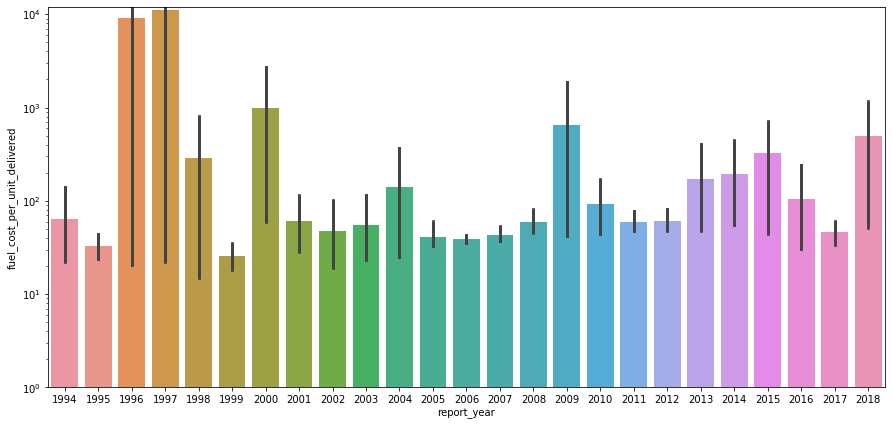

In [22]:
#Question 10 Data Visualization
year_bar = fuel_data['report_year']
cost_bar = fuel_data['fuel_cost_per_unit_delivered']
plt.figure(figsize=(15,7))
plt.xticks(rotation=360)
sns.barplot(x = year_bar, y = cost_bar, data=fuel_data)
plt.xlabel('Fuel Unit')
g = sns.barplot(x = year_bar, y = cost_bar)
g.set_yscale("log")
g.set_ylim(1, 12000)